# Introduction

For this research, the HSBC banking organization is chosen in which a
supervised model pipeline will be implemented for detecting banking
transaction frauds. In the banking sector, transaction fraud is becoming
an increasingly serious problem. Banks suffer billion-dollar annual
losses as a result of fraud. By the analysis of massive amounts of data
and the identification of questionable activity, machine learning models
can assist in the detection and mitigation of fraud. These models employ
a variety of techniques to find anomalies and signal questionable
activity. In order to help banks, take preventative action against
fraud, machine learning models can also be employed to spot patterns or
trends in fraud. Apart from that, data exploration, pre-processing as
well as data modeling has been performed based on the HSBC banking
transaction dataset.

# Selection of the company and problem statement

HSBC is one of the largest finances as well as banking services
providers in the globe. Additionally, it serves over thirty million
customers as well as works across more than sixty nations or regions.
Nowadays, transaction frauds are the biggest issues that HSBC
organizations face. Customers are seriously impacted by fraudulent
transactions, which also damages their faith in the organization for
which HSBC wants to apply machine learning techniques with the help of a
data scientist for designing transaction frauds before it happens
(Kyriienko and Magnusson, 2022). It assists the company in discovering
potential fraud attempts before they take place, permitting HSBC to take
measures in order to protect its customers. Moreover, transaction fraud
prediction is a crucial component of HSBC's risk management approach and
aids in the company's ability to uphold its position as a respected
authority in the banking and financial services sector. In this study,
the transaction fraud dataset has been collected from the online
platform that provides accessibility to the data scientist to build the
“supervised machine learning model”. The problem statement for HSBC
banking transaction fraud prediction is to develop a model that can
accurately detect and identify fraudulent transactions within the HSBC
banking system. The model should be able to identify potential fraud
cases in a timely manner and reduce the risk of fraudulent transactions
occurring in the future. The model should also be able to differentiate
between legitimate and fraudulent transactions.

In \[ \]:

    import pandas as readcsv
    import numpy as np
    import seaborn as sns_graph
    import matplotlib.pyplot as plt_graph

In \[ \]:

    from sklearn.model_selection import train_test_split as TTS
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score as model_accuracy
    from sklearn.svm import SVC as SVMmodel
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import metrics as met
    from sklearn.metrics import mean_squared_error as MSE
    from sklearn import tree  as DCTREE
    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

### Banking Dataset Import and exploration Stage

In \[ \]:

    #Import dataset here
    banking_dataset = readcsv.read_csv("D:/Dataset/
    PS_20174392719_1491204439457_log.csv")

In \[ \]:

    banking_dataset

Out\[ \]:

|         | step | type     | amount     | nameOrig    | oldbalanceOrg | newbalanceOrig | nameDest    | oldbalanceDest | newbalanceDest | isFraud | isFlaggedFraud |
|---------|------|----------|------------|-------------|---------------|----------------|-------------|----------------|----------------|---------|----------------|
| 0       | 1    | PAYMENT  | 9839.64    | C1231006815 | 170136.00     | 160296.36      | M1979787155 | 0.00           | 0.00           | 0       | 0              |
| 1       | 1    | PAYMENT  | 1864.28    | C1666544295 | 21249.00      | 19384.72       | M2044282225 | 0.00           | 0.00           | 0       | 0              |
| 2       | 1    | TRANSFER | 181.00     | C1305486145 | 181.00        | 0.00           | C553264065  | 0.00           | 0.00           | 1       | 0              |
| 3       | 1    | CASH_OUT | 181.00     | C840083671  | 181.00        | 0.00           | C38997010   | 21182.00       | 0.00           | 1       | 0              |
| 4       | 1    | PAYMENT  | 11668.14   | C2048537720 | 41554.00      | 29885.86       | M1230701703 | 0.00           | 0.00           | 0       | 0              |
| ...     | ...  | ...      | ...        | ...         | ...           | ...            | ...         | ...            | ...            | ...     | ...            |
| 6362615 | 743  | CASH_OUT | 339682.13  | C786484425  | 339682.13     | 0.00           | C776919290  | 0.00           | 339682.13      | 1       | 0              |
| 6362616 | 743  | TRANSFER | 6311409.28 | C1529008245 | 6311409.28    | 0.00           | C1881841831 | 0.00           | 0.00           | 1       | 0              |
| 6362617 | 743  | CASH_OUT | 6311409.28 | C1162922333 | 6311409.28    | 0.00           | C1365125890 | 68488.84       | 6379898.11     | 1       | 0              |
| 6362618 | 743  | TRANSFER | 850002.52  | C1685995037 | 850002.52     | 0.00           | C2080388513 | 0.00           | 0.00           | 1       | 0              |
| 6362619 | 743  | CASH_OUT | 850002.52  | C1280323807 | 850002.52     | 0.00           | C873221189  | 6510099.11     | 7360101.63     | 1       | 0              |

6362620 rows × 11 columns

Various types of python libraries, such as "pandas, numpy, SVC" and
others are imported in this jupyter pipeline, which helps to build the
supervised machine learning model regarding banking transaction fraud
prediction. Apart from that, the read_csv code has been considered here
to handle the banking CSV dataset. The dataset output is shown in the
above image where data scientists can visualize the data types, columns
as well as row numbers.

As the dataset conatins huge amount of value, it can creates
difficulties. For this reason, some data has been chosen from the
dataset to build the supervised machine leanring model.

In \[ \]:

    banking_dataset=banking_dataset.head(n=20000)

In \[ \]:

    banking_dataset.info(verbose=True, null_counts=True)

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 20000 entries, 0 to 19999
    Data columns (total 11 columns):
     #   Column          Non-Null Count  Dtype  
    ---  ------          --------------  -----  
     0   step            20000 non-null  int64  
     1   type            20000 non-null  object
     2   amount          20000 non-null  float64
     3   nameOrig        20000 non-null  object
     4   oldbalanceOrg   20000 non-null  float64
     5   newbalanceOrig  20000 non-null  float64
     6   nameDest        20000 non-null  object
     7   oldbalanceDest  20000 non-null  float64
     8   newbalanceDest  20000 non-null  float64
     9   isFraud         20000 non-null  int64  
     10  isFlaggedFraud  20000 non-null  int64  
    dtypes: float64(5), int64(3), object(3)
    memory usage: 1.7+ MB

    C:\Users\MrNobody\AppData\Local\Temp\ipykernel_2336\2649811444.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
      banking_dataset.info(verbose=True, null_counts=True)

In \[ \]:

    banking_dataset.columns

Out\[ \]:

    Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
           'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
           'isFlaggedFraud'],
          dtype='object')

In \[ \]:

    banking_dataset.dtypes

Out\[ \]:

    step                int64
    type               object
    amount            float64
    nameOrig           object
    oldbalanceOrg     float64
    newbalanceOrig    float64
    nameDest           object
    oldbalanceDest    float64
    newbalanceDest    float64
    isFraud             int64
    isFlaggedFraud      int64
    dtype: object

In \[ \]:

    print(banking_dataset["isFraud"].describe())

    count    20000.000000
    mean         0.004050
    std          0.063512
    min          0.000000
    25%          0.000000
    50%          0.000000
    75%          0.000000
    max          1.000000
    Name: isFraud, dtype: float64

In this case, the banking dataset column names are shown by applying the
column () function. Moreover, the dtypes function helps to view all the
column's data types, such as integer, float, and others. Further, the
"info ()" code has been used to display information about the
banking_dataset, including the data types and the number of entries for
each column. The "verbose=True argument" displays additional information
about the data types, such as the byte size of each column. The
"null_counts=True argument" displays the number of non-null values in
each column, which can help data scientists identify potential missing
or incomplete data.

## Data Pre-processing Stage Executed Here

In \[ \]:

    # Eloboarte dataset mean, count and other values
    banking_dataset.describe()

Out\[ \]:

|       | step         | amount       | oldbalanceOrg | newbalanceOrig | oldbalanceDest | newbalanceDest | isFraud      | isFlaggedFraud |
|-------|--------------|--------------|---------------|----------------|----------------|----------------|--------------|----------------|
| count | 20000.000000 | 2.000000e+04 | 2.000000e+04  | 2.000000e+04   | 2.000000e+04   | 2.000000e+04   | 20000.000000 | 20000.0        |
| mean  | 5.889400     | 1.259584e+05 | 8.050588e+05  | 8.215246e+05   | 8.159052e+05   | 1.174361e+06   | 0.004050     | 0.0            |
| std   | 2.473979     | 2.967104e+05 | 2.213398e+06  | 2.255167e+06   | 2.481246e+06   | 3.147339e+06   | 0.063512     | 0.0            |
| min   | 1.000000     | 2.390000e+00 | 0.000000e+00  | 0.000000e+00   | 0.000000e+00   | 0.000000e+00   | 0.000000     | 0.0            |
| 25%   | 5.000000     | 5.272017e+03 | 0.000000e+00  | 0.000000e+00   | 0.000000e+00   | 0.000000e+00   | 0.000000     | 0.0            |
| 50%   | 7.000000     | 1.582517e+04 | 1.994350e+04  | 5.718700e+03   | 0.000000e+00   | 0.000000e+00   | 0.000000     | 0.0            |
| 75%   | 8.000000     | 1.416616e+05 | 1.274126e+05  | 1.287949e+05   | 2.887678e+05   | 4.284093e+05   | 0.000000     | 0.0            |
| max   | 8.000000     | 1.000000e+07 | 2.235231e+07  | 2.246600e+07   | 2.278747e+07   | 2.878359e+07   | 1.000000     | 0.0            |

In \[ \]:

    # Checking null values in this dataset
    banking_dataset.isnull().sum()

Out\[ \]:

    step              0
    type              0
    amount            0
    nameOrig          0
    oldbalanceOrg     0
    newbalanceOrig    0
    nameDest          0
    oldbalanceDest    0
    newbalanceDest    0
    isFraud           0
    isFlaggedFraud    0
    dtype: int64

It is important for each data modeling to remove the null values as it
ensures that data is accurate as well as of high quality. Moreover, null
values might cause the model to be biased as they can produce false
conclusions or outcomes (Makkar et al. 2022). Removing null values
additionally reduces the possibility of overfitting as well as increases
the model's accuracy. Apart from that, the “is null ()” command is
considered here to check the availability of null values of the banking
dataset.

In \[ \]:

    # generate Heatmap based on entire dataset
    sns_graph.heatmap(banking_dataset.corr(),annot=True)

Out\[ \]:

    <AxesSubplot:>

![](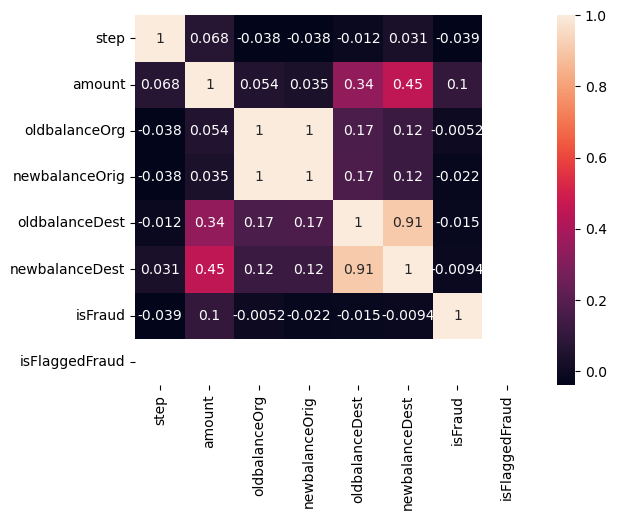%0A)

### Data Visualisation Step Impementation has been shown here

In \[ \]:

    plt_graph.hist(banking_dataset['amount'], bins=10)
    plt_graph.title('Distribution of Transaction Amount')
    plt_graph.xlabel('Amount')
    plt_graph.ylabel('Frequency')

Out\[ \]:

    Text(0, 0.5, 'Frequency')

![](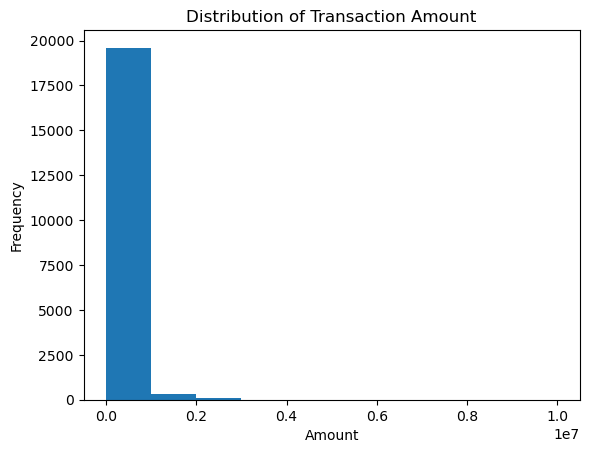%0A)

In \[ \]:

    sns_graph.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=banking_dataset)
    plt_graph.title('Balance Changes for Origin Account')

Out\[ \]:

    Text(0.5, 1.0, 'Balance Changes for Origin Account')

![](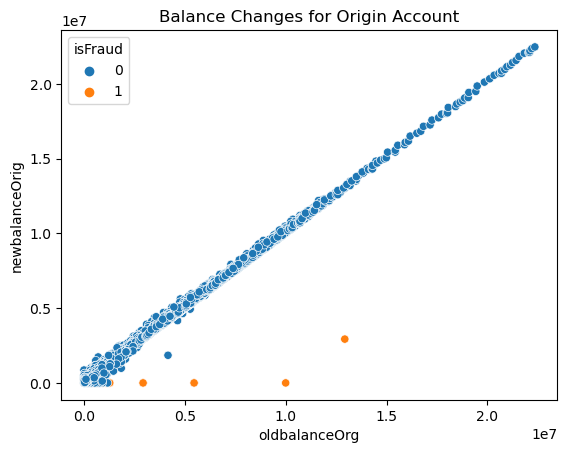%0A)

In \[ \]:

    pivottable = readcsv.pivot_table(banking_dataset, index='step', columns='isFraud', values='amount', aggfunc='mean')
    print(pivottable.head())

    isFraud              0             1
    step                                
    1        104639.277169  2.337654e+05
    2         81247.526382  5.233241e+05
    3         78881.481168  1.670819e+04
    4         83801.357964  2.640027e+06
    5         68537.554188  6.364026e+04

In \[ \]:

    sns_graph.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=banking_dataset)
    plt_graph.title('Balance Changes for Destination Account')

Out\[ \]:

    Text(0.5, 1.0, 'Balance Changes for Destination Account')

![](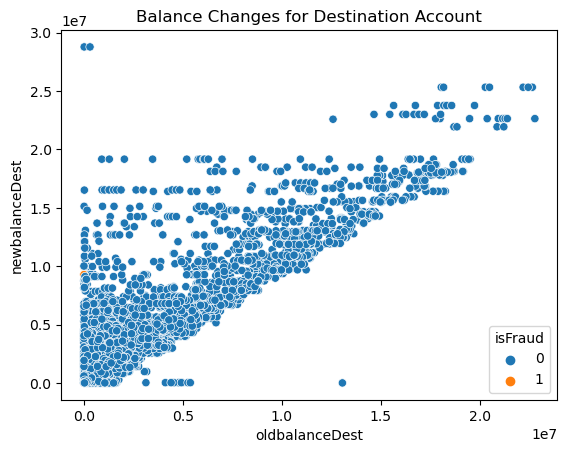%0A)

Above codes have been considered in this jupyter pipeline in order to
generate a scatter plot that represents the balance changes for the
destination account in a banking transaction. Further, this plot helps
to detect potentially fraudulent transactions by comparing the old
balance or new balance of the destination account. Apart from that, a
significant amount rise that does not correlate to any additional
transactions is a sign of fraud. With the utilization of the bar plots,
it helps to be labeled "Balance Changes for Destination Account" and the
hue will indicate whether the transaction is fraudulent or not (Joy,
Babu and Chandy, 2021). Therefore, this can help the HSBC organization
to prevent banking transaction fraud by quickly discovering potential
fraudulent transactions as well as taking appropriate action.

In \[ \]:

    tranc_type=banking_dataset['type'].value_counts()
    plt_graph.title('\n Distribution of transaction type')
    plt_graph.pie(tranc_type.values,labels=tranc_type.index,autopct='%.2f')

Out\[ \]:

    ([<matplotlib.patches.Wedge at 0x1d8151a56a0>,
      <matplotlib.patches.Wedge at 0x1d8151a5dc0>,
      <matplotlib.patches.Wedge at 0x1d815617520>,
      <matplotlib.patches.Wedge at 0x1d815617c40>,
      <matplotlib.patches.Wedge at 0x1d8156263a0>],
     [Text(-0.07596607924664518, 1.09737375346957, 'PAYMENT'),
      Text(-0.8332963445091922, -0.7180649011249735, 'CASH_OUT'),
      Text(0.28592479738534143, -1.0621897242207494, 'CASH_IN'),
      Text(0.9912263889563672, -0.4769384088501585, 'TRANSFER'),
      Text(1.097361817697921, -0.07613830217909318, 'DEBIT')],
     [Text(-0.04143604322544282, 0.5985675018924926, '52.20'),
      Text(-0.4545252788231957, -0.39167176424998545, '18.24'),
      Text(0.1559589803920044, -0.5793762132113177, '17.49'),
      Text(0.5406689394307457, -0.26014822300917734, '9.87'),
      Text(0.5985609914715933, -0.04152998300677809, '2.21')])

![](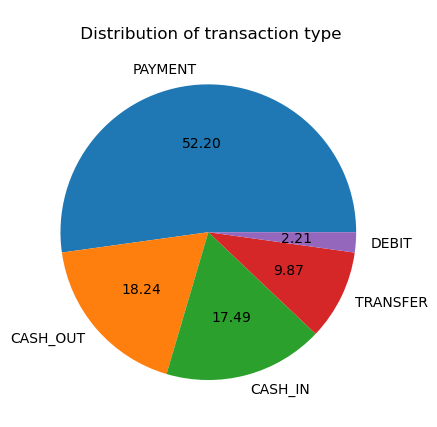%0A)

This code is used to create a pie chart that shows the distribution of
transaction types in a banking dataset. The pie chart displays the
proportion of each transaction type in a visual format for which data
scientists of HSBC company can easily understand which type of
transactions are higher. Apart from that, this makes it easier for the
HSBC organization to spot any odd or suspicious trends in the
transaction (Thi et al. 2020). For instance, when the organization
notices a high percentage of specific kinds of transactions, they can
look into it deeper to find any possible fraud. The organization can
discover any potential hazards associated with particular types of
transactions by having an easily understood graphic representation of
the transaction categories.

In \[ \]:

    sns_graph.barplot(x=banking_dataset.type.unique(),
                      y=banking_dataset.groupby("type")["isFraud"].sum())

Out\[ \]:

    <AxesSubplot:ylabel='isFraud'>

![](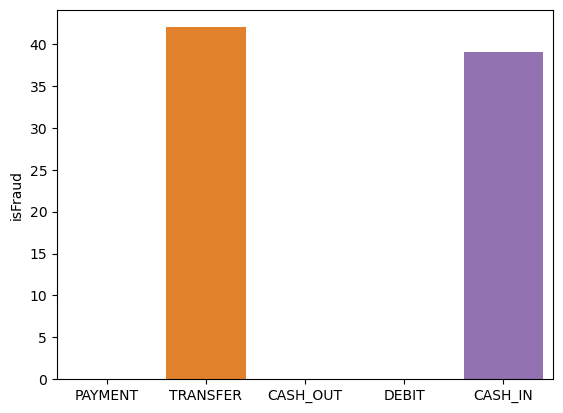%0A)

The above bar plots represent the total number of fraudulent
transactions by type of transaction with the help of the "bar plot ()
function" and the HSBC banking dataset. Therefore, by visualizing this
information, the HSBC organization can detect the transaction types that
are more prone to fraud as well as take the required steps to stop the
fraud. For instance, they might increase protection for those particular
transactions and accelerate the verification procedure (Bhatia, 2022).
This barplot may be employed as well to analyze the fraud rate among
various transaction types, allowing HSBC to determine which types of
transactions need additional monitoring and action.

In \[ \]:

    sns_graph.barplot(x=banking_dataset['type'], y=banking_dataset['isFraud'])

Out\[ \]:

    <AxesSubplot:xlabel='type', ylabel='isFraud'>

![](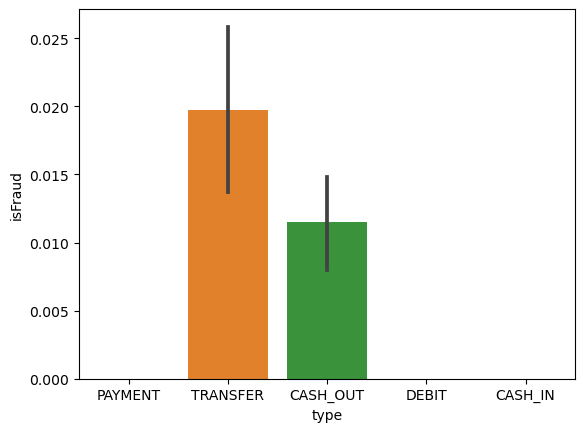%0A)

#### Dataset Splitting in train and test

In \[ \]:

    banking_dataset2=banking_dataset.drop(['isFlaggedFraud', 'type', 'nameDest','nameOrig'], axis=1)

In \[ \]:

    banking_dataset2.head()

Out\[ \]:

|     | step | amount   | oldbalanceOrg | newbalanceOrig | oldbalanceDest | newbalanceDest | isFraud |
|-----|------|----------|---------------|----------------|----------------|----------------|---------|
| 0   | 1    | 9839.64  | 170136.0      | 160296.36      | 0.0            | 0.0            | 0       |
| 1   | 1    | 1864.28  | 21249.0       | 19384.72       | 0.0            | 0.0            | 0       |
| 2   | 1    | 181.00   | 181.0         | 0.00           | 0.0            | 0.0            | 1       |
| 3   | 1    | 181.00   | 181.0         | 0.00           | 21182.0        | 0.0            | 1       |
| 4   | 1    | 11668.14 | 41554.0       | 29885.86       | 0.0            | 0.0            | 0       |

In \[ \]:

    Xval = banking_dataset2.iloc[:, :-1]
    Yval = banking_dataset2.iloc[:, -1]

In \[ \]:

    print(Xval)

           step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
    0         1    9839.64       170136.0       160296.36            0.00   
    1         1    1864.28        21249.0        19384.72            0.00   
    2         1     181.00          181.0            0.00            0.00   
    3         1     181.00          181.0            0.00        21182.00   
    4         1   11668.14        41554.0        29885.86            0.00   
    ...     ...        ...            ...             ...             ...   
    19995     8   17031.89       105935.0        88903.11            0.00   
    19996     8  121530.49        10430.0       131960.49        99479.60   
    19997     8  780953.77       905174.0       124220.23         3145.61   
    19998     8    9987.56        39734.0        29746.44            0.00   
    19999     8  149516.02       100643.0       250159.02        30427.00   

           newbalanceDest  
    0                0.00  
    1                0.00  
    2                0.00  
    3                0.00  
    4                0.00  
    ...               ...  
    19995            0.00  
    19996        98055.06  
    19997      1925872.77  
    19998            0.00  
    19999            0.00  

    [20000 rows x 6 columns]

The included image visualizes the python codes that help to define the
target columns based on the dataset. In this case, the isFraud column of
the HSBC banking transaction dataset has been selected as the target
column to build the supervised ML pipeline. Some columns are removed
from the data frame by executing the drop function, such as type,
nameDest, and others. The print function helps in order display the X
and Y values corresponding to the HSBC banking dataset.

In \[ \]:

    print(Yval)

    0        0
    1        0
    2        1
    3        1
    4        0
            ..
    19995    0
    19996    0
    19997    0
    19998    0
    19999    0
    Name: isFraud, Length: 20000, dtype: int64

In \[ \]:

    XtrainVal, XtestVal, YtrainVal, YtestVal = TTS(Xval , Yval, test_size = 0.2 , random_state =102)

In \[ \]:

    print(XtrainVal.shape)
    print(XtestVal.shape)

    (16000, 6)
    (4000, 6)

The above code is utilizing the train_test_split() function for
splitting the HSBC banking dataset into training and testing sets. The
Xval and Yval variables are the feature as well as label values of the
transaction dataset that is to be split, and the test_size argument is a
float that specifies the proportion of the dataset to include in the
test split is 20%. Moreover, the random_state argument is an integer
that is utilized in order to seed the random number generator so that
the same train/test split is created each time the code is run
(Desrousseaux, Bernard and Mariage, 2021). This assists data scientists
to evaluate their models on the same test set and helps to reduce the
chances of overfitting on the training set.

### Supervised Machine learning Model Exeucution for banking fraud transction predicton

### Building Random Forest Model

In \[ \]:

    RandomForestModel = RandomForestClassifier(n_estimators= 100)

In \[ \]:

    #Fitiing the created model
    Model_Fit = RandomForestModel.fit(XtrainVal, YtrainVal)

In \[ \]:

    print(Model_Fit)

    RandomForestClassifier()

In \[ \]:

    # Calculating Model Prediction value after create the model
    PredectionScore = RandomForestModel.predict(XtestVal)
    RandomForestAccuracy= model_accuracy(YtestVal, PredectionScore)*100

In \[ \]:

    print("Random Forest Model Accouracy Score is:----", RandomForestAccuracy)

    Random Forest Model Accouracy Score is:---- 99.52499999999999

This code has been utilized in order to create a Random Forest
Classifier model with a given estimator number, fit the model with the
given training, and test data, and then predict the model's score on the
test data. Apart from that, the "model_accuracy ()" command is applied
here to calculate the random forest model accuracy. In HSBC, the "random
Forest model" can be applied as it identifies fraudulent transactions in
real-time for which the company can easily find out the cheaters and
stop losing customers’ data (Kerzic, 2022). This type of model also
recognizes transaction patterns, which assists in detecting fraudulent
transactions. Moreover, it can analyze transaction data like transaction
amount, transaction location, and other relevant variables that are
related to fraud.

In addition to that, this model can be utilized in order to build
predictive models that detect potential frauds before they occur. By
analyzing historical transaction data, the model can find anomalies that
are applied to predict fraudulent transactions in the future (Vassallo,
Vella and Ellul, 2021). In some cases, it uses to monitor transactions
in real-time as well as flag suspicious transactions. For this reason,
this can help HSBC organization for preventing fraudulent transactions
before they are completed.

In \[ \]:

    RandomForestprecision = precision_score(YtestVal, PredectionScore)
    RandomForestrecall = recall_score(YtestVal, PredectionScore)
    RandomForestf1 = f1_score(YtestVal, PredectionScore)
    RandomForest_roc_auc = roc_auc_score(YtestVal, PredectionScore)

In \[ \]:

    # Create table in order to summarize the Model performance
    performance_table = readcsv.DataFrame({'Metric': ['Model Accuracy', 'Precision Value', 'Recall', 'F1 Score', 'ROC AUC Score'],
                                      'Value': [RandomForestAccuracy, RandomForestprecision, RandomForestrecall, RandomForestf1, RandomForest_roc_auc]})
    print(performance_table)

                Metric      Value
    0   Model Accuracy  99.525000
    1  Precision Value   0.875000
    2           Recall   0.280000
    3         F1 Score   0.424242
    4    ROC AUC Score   0.639874

A random forest model performance table has been generated with the
utilization of the above codes. Moreover, a data frame is designed based
on the model accuracy, precision value, and other details. The model
accuracy is shown as 99% and other values are also shown in the above
image.

### SVM Model Building and Evaluating

In \[ \]:

    XTrainSet, XTestSet, YTrainSet, YTestSet = TTS(Xval , Yval, test_size = 0.3 , random_state =102)

In \[ \]:

    Build_SVM_Model = SVMmodel()
    Model=Build_SVM_Model.fit(XTrainSet, YTrainSet)

In \[ \]:

    print(Model)

    SVC()

In \[ \]:

    SVM_Prediction = Build_SVM_Model.predict(XTestSet)

In \[ \]:

    Calculate_Accuracy = model_accuracy(YTestSet, SVM_Prediction)*100

In \[ \]:

    print("SVM Model Accurcay Score is:---", Calculate_Accuracy)

    SVM Model Accurcay Score is:--- 99.4

In \[ \]:

    SVMprecision = precision_score(YTestSet, SVM_Prediction)
    SVMrecall = recall_score(YTestSet, SVM_Prediction)
    SVMf1 = f1_score(YTestSet, SVM_Prediction)
    SVM_roc_auc = roc_auc_score(YTestSet, SVM_Prediction)

    C:\Users\MrNobody\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))

In \[ \]:

    # Create table in order to summarize the Model performance
    performance_table = readcsv.DataFrame({'Metric': ['Model Accuracy', 'Precision Value', 'Recall', 'F1 Score', 'ROC AUC Score'],
                                      'Value': [Calculate_Accuracy, SVMprecision, SVMrecall, SVMf1, SVM_roc_auc]})
    print(performance_table)

                Metric  Value
    0   Model Accuracy   99.4
    1  Precision Value    0.0
    2           Recall    0.0
    3         F1 Score    0.0
    4    ROC AUC Score    0.5

### Decision Tree Model

In \[ \]:

    tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    ModelFit = tree_classifier.fit(XtrainVal,YtrainVal)
    y_predict_Value = ModelFit.predict(XtestVal)

In \[ \]:

    print("Model Accuracy is:--",met.accuracy_score(YtestVal, y_predict_Value))

    Model Accuracy is:-- 0.99375

In \[ \]:

    print("The MSE Value is=",MSE(YtestVal,y_predict_Value))
    print("The RMSE value is=",np.sqrt(MSE(YtestVal,y_predict_Value)))

    The MSE Value is= 0.00625
    The RMSE value is= 0.07905694150420949

In \[ \]:

    DCTREE.plot_tree(ModelFit)

Out\[ \]:

    [Text(0.5909090909090909, 0.875, 'X[3] <= 2.29\nentropy = 0.034\nsamples = 16000\nvalue = [15944, 56]'),
     Text(0.36363636363636365, 0.625, 'X[2] <= 10118.735\nentropy = 0.064\nsamples = 7314\nvalue = [7259, 55]'),
     Text(0.18181818181818182, 0.375, 'X[1] <= 232.23\nentropy = 0.015\nsamples = 5896\nvalue = [5888, 8]'),
     Text(0.09090909090909091, 0.125, 'entropy = 0.65\nsamples = 36\nvalue = [30, 6]'),
     Text(0.2727272727272727, 0.125, 'entropy = 0.004\nsamples = 5860\nvalue = [5858, 2]'),
     Text(0.5454545454545454, 0.375, 'X[0] <= 6.5\nentropy = 0.21\nsamples = 1418\nvalue = [1371, 47]'),
     Text(0.45454545454545453, 0.125, 'entropy = 0.501\nsamples = 362\nvalue = [322, 40]'),
     Text(0.6363636363636364, 0.125, 'entropy = 0.058\nsamples = 1056\nvalue = [1049, 7]'),
     Text(0.8181818181818182, 0.625, 'X[1] <= 6158704.5\nentropy = 0.002\nsamples = 8686\nvalue = [8685, 1]'),
     Text(0.7272727272727273, 0.375, 'entropy = 0.0\nsamples = 8685\nvalue = [8685, 0]'),
     Text(0.9090909090909091, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

![](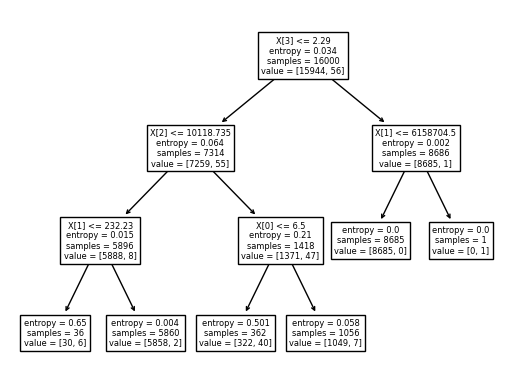%0A)

This code has been utilized for setting up a "decision Tree Classifier
model" in order to try to predict banking frauds at HSBC. Moreover, the
"decision tree classifier" is applied for classifying the banking data
by creating a tree structure. The criterion parameter has been set as
"entropy" which means it measures disorder as well as the max_depth
parameter is set to 3 which limits the depth of the tree that is built.
Further, the ModelFit variable is defined here to fit the data to the
decision tree model and the y_predict_Value variable is used to predict
the output from the model. By using this model, HSBC can detect banking
frauds more accurately. The Decision Tree Classifier is useful for
identifying patterns in data that could indicate fraud. By limiting the
depth of the tree to 3, the model can more quickly identify patterns in
the data and make predictions with greater accuracy (Lokanan and
Maddhesia, 2023). This can help HSBC to stop banking frauds more quickly
and effectively.

# 4.0 Conclusion & Recommendation

From the above research, it can be concluded that a random
forest-supervised model pipeline has been designed here with the help of
python programming to predict the HSBC organization's banking
transaction frauds. Apart from that, EDA analysis is also performed here
with respect to the HSBC organization banking data for which
organizations data scientists can understand which type of transition
frauds are higher and other details. The data preprocessing steps help
to prepare the clean and appropriate dataset for building the supervised
learning model.

After performing the two-machine learning model for HSBC organization
fraud transactions prediction, it can be concluded that random forest
model performs better where model accuracy is 99.52% as compared to the
decision tree model where model accuracy is 99.34%. Besides that, the,
random forest model has various benefits, such as it is less prone to
over fitting than decision trees. Random forest models also have the
advantage of being able to handle large data sets, and can deal with
both numerical and categorical data. At last, random forest models can
be used for both supervised and unsupervised learning. It uses multiple
decision trees and combines their outcomes to make a more accurate
prediction. In addition to that, random forest models allow for more
complex relationships to be identified and utilized in the prediction
process.

On the other hand, one of the biggest financial and banking companies in
the world, HSBC needs to have its banking transactions secured from
fraudsters. Moreover, the business is constantly looking for innovative
tools or techniques that protect its customers' money against fraud.
These techniques and tools should be used to spot fraud early on and
stop it from happening again. HSBC can utilize more advanced data
analysis tools for better prediction of frauds as well as secure
customer data. Organizations can also implement deep learning techniques
in order to develop transaction fraud detection systems for their
organizations.

